In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *
from matplotlib.ticker import AutoMinorLocator
from matplotlib.animation import FuncAnimation
from scipy.integrate import odeint
from scipy.fftpack import fft, fftfreq, fftshift
from scipy.signal import find_peaks
# from nolds import lyap_r
from scipy.integrate import solve_ivp
from functools import partial


plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['mathtext.rm'] = 'serif'
plt.rcParams['font.family'] = 'serif'
plt.rcParams.update({'figure.autolayout': True})


# Figs. 1(a-c) and right panel of Fig. 1(g-i): Time evolution of mean-field equations and freuqnecy spectrum

In [2]:


def mean_field(m, t, p):
    """
    Mean-filed equations described in Eq. (2) of main text

    """
   
    xA, pA, xB, pB = m
    Omega,kappa,U = p
   
    f = [ Omega*pB/2-kappa*xA*(xB**2+pB**2)/4+U*pA*(xA**2+pA**2),
         -Omega*xB/2-kappa*pA*(xB**2+pB**2)/4-U*xA*(xA**2+pA**2),
         Omega*pA/2+kappa*xB*(xA**2+pA**2)/4+U*pB*(xB**2+pB**2),
         -Omega*xA/2+kappa*pB*(xA**2+pA**2)/4-U*xB*(xB**2+pB**2)]
   
    return f

def fourier_transform(data, dt):
    
    """
    To obtain the FFT of the mean-field dynamics
    """
    n = len(data)
    fft_result = np.fft.fft(data)
    fft_freq = 2*np.pi*np.fft.fftfreq(n, dt)
    return fft_freq, fft_result


# Ω vlaues considered in Fig. 1

Ω = [0.8,1.45] #For [Fig. 1(b), Fig. 1(a,c)

# U vlaues considered in Fig. 1

U = [0, 0.25] # For [Fig. 1(a), Fig. 1(b,c)]

κ=1

# Choosing inital state
xx=0
m0 = [np.sqrt(xx), np.sqrt(2-xx), np.sqrt(xx), np.sqrt(2-xx)]

# Time evolution steps and range
f_s = 10                              # number of time steps
end = 4000                             # final time
time = np.linspace(0.0, end, end*f_s)

# Creating different choices of parameters to simulate
p01 = [Ω[1],κ,U[0]]
p10 = [Ω[0],κ,U[1]]
p11 = [Ω[1],κ,U[1]]

# ODE solver parameters
abserr = 1.0e-8
relerr = 1.0e-6
stoptime = 10.0
numpoints = 250

# Time evolution for Fig. 1

msol01 = odeint(mean_field, m0, time, args=(p01,), atol=abserr, rtol=relerr) #For Fig. 1(a)
msol10 = odeint(mean_field, m0, time, args=(p10,), atol=abserr, rtol=relerr) #For Fig. 1(b)
msol11 = odeint(mean_field, m0, time, args=(p11,), atol=abserr, rtol=relerr) #For Fig. 1(c)



# Finding FFT of the time evolution of mean-field equations

fft_freqA1, fft_resultA1 = fourier_transform(msol01[:,1], 1/f_s)
fft_freqB1, fft_resultB1 = fourier_transform(msol01[:,3], 1/f_s)
fft_freqA2, fft_resultA2 = fourier_transform(msol10[:,1], 1/f_s)
fft_freqB2, fft_resultB2 = fourier_transform(msol10[:,3], 1/f_s)
fft_freqA3, fft_resultA3 = fourier_transform(msol11[:,1], 1/f_s)
fft_freqB3, fft_resultB3 = fourier_transform(msol11[:,3], 1/f_s)

In [3]:
# Save Data
np.savetxt("TC1.dat",msol01 , delimiter=' ')
np.savetxt("TC2.dat",msol10 , delimiter=' ')
np.savetxt("TC3.dat",msol11 , delimiter=' ')
np.savetxt("FFT_Freq.dat",fft_freqA1 , delimiter=' ')
np.savetxt("FFT_TC_A1.dat",np.abs(fft_resultA1) , delimiter=' ', fmt="%.6e")
np.savetxt("FFT_TC_A2.dat",np.abs(fft_resultA2) , delimiter=' ', fmt="%.6e")
np.savetxt("FFT_TC_A3.dat",np.abs(fft_resultA3) , delimiter=' ', fmt="%.6e")
np.savetxt("FFT_TC_B1.dat",np.abs(fft_resultA1) , delimiter=' ', fmt="%.6e")
np.savetxt("FFT_TC_B2.dat",np.abs(fft_resultA2) , delimiter=' ', fmt="%.6e")
np.savetxt("FFT_TC_B3.dat",np.abs(fft_resultA3) , delimiter=' ', fmt="%.6e")

In [4]:
# Read Data

msol01=np.loadtxt('TC1.dat',delimiter=' ')
msol10=np.loadtxt('TC2.dat',delimiter=' ')
msol11=np.loadtxt('TC3.dat',delimiter=' ')


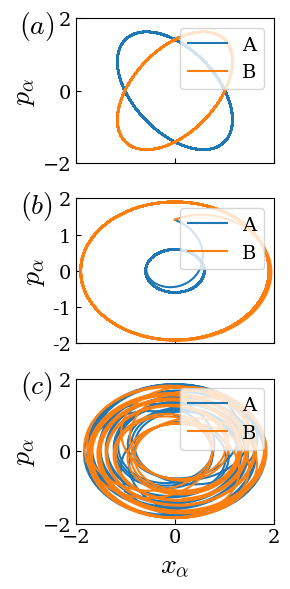

In [5]:
lab_size=14
leg_size=14
cap_size=20

fig, ax = plt.subplots(3,1, figsize=(3,6))#, gridspec_kw={'height_ratios': [1, 0.4, 0.6, 0.4]}


ax[0].plot(msol01[:,0],msol01[:,1], label='A')

ax[1].plot(msol10[:,0],msol10[:,1], label='A')

ax[2].plot(msol11[0:1000,0],msol11[0:1000,1], label='A')

ax[0].plot(msol01[:,2],msol01[:,3], label='B')

ax[1].plot(msol10[:,2],msol10[:,3], label='B')

ax[2].plot(msol11[0:1000,2],msol11[0:1000,3], label='B')




ax[0].tick_params(which='both', direction='in', labelsize=lab_size)
ax[0].xaxis.set_ticklabels([])
ax[0].legend(loc='upper right', fontsize=leg_size)
ax[0].set_ylabel(r'$p_\alpha$', fontsize=cap_size)

ax[0].set_xlim(-2, 2)
ax[0].set_ylim(-2, 2)

ax[1].yaxis.set_ticks([-2,-1,0,1,2])
ax[1].yaxis.set_ticklabels([-2,-1,0,1,2])
ax[1].xaxis.set_ticklabels([])

ax[1].set_ylabel(r'$p_\alpha$', fontsize=cap_size)
# ax[2,0].set_title(rf'$\Omega/\kappa={Ω[0]},\mu={mu},U={U}$', fontsize=14)
ax[1].tick_params(which='both', direction='in', labelsize=lab_size)
ax[1].legend(loc='upper right', fontsize=leg_size)
ax[1].set_xlim(-2, 2)
ax[1].set_ylim(-2, 2)

ax[2].set_xlabel(r'$x_\alpha$', fontsize=cap_size)
# ax[2,1].set_title(rf'$\Omega/\kappa={Ω[1]},\mu={mu},U={U}$', fontsize=14)
ax[2].tick_params(which='both', direction='in', labelsize=lab_size)
# ax[2].yaxis.set_ticklabels([])
ax[2].legend(loc='upper right', fontsize=leg_size)
ax[2].set_xlim(-2, 2)
ax[2].set_ylim(-2, 2)
ax[2].set_ylabel(r'$p_\alpha$', fontsize=cap_size)

ax[0].text(
    -2.8, 1.8,  # Position (x, y) in figure coordinates
    r'$(a)$',  # Text to display
    ha='center',  # Horizontal alignment
    va='center',  # Vertical alignment
    fontsize=20  # Font size
#     color='white'
)
ax[1].text(
    -2.8, 1.8,  # Position (x, y) in figure coordinates
    r'$(b)$',  # Text to display
    ha='center',  # Horizontal alignment
    va='center',  # Vertical alignment
    fontsize=20  # Font size
#     color='white'
)
ax[2].text(
    -2.8, 1.8,  # Position (x, y) in figure coordinates
    r'$(c)$',  # Text to display
    ha='center',  # Horizontal alignment
    va='center',  # Vertical alignment
    fontsize=20  # Font size
#     color='white'
)


plt.tight_layout()
# plt.savefig('TC123_MF.svg',dpi=300)
plt.show()



In [6]:
# load data

freq=np.loadtxt("FFT_Freq.dat" , delimiter=' ')
FFT_pA_TC1=np.loadtxt("FFT_TC_A1.dat" , delimiter=' ')
FFT_pA_TC2=np.loadtxt("FFT_TC_A2.dat" , delimiter=' ')
FFT_pA_TC3=np.loadtxt("FFT_TC_A3.dat" , delimiter=' ')
FFT_pB_TC1=np.loadtxt("FFT_TC_B1.dat" , delimiter=' ')
FFT_pB_TC2=np.loadtxt("FFT_TC_B2.dat" , delimiter=' ')
FFT_pB_TC3=np.loadtxt("FFT_TC_B3.dat" , delimiter=' ')

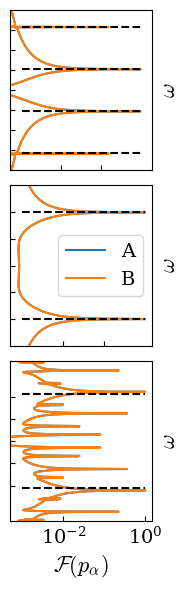

In [7]:
lab_size=14
leg_size=14
cap_size=16
alp=0.3
fig, ax = plt.subplots(3, 1, figsize=(2,6))
# plt.subplots_adjust(hspace=0,wspace=0.01)

ax[0].semilogx(FFT_pA_TC1/np.max(FFT_pA_TC1),freq, '',label='A')
ax[0].semilogx(FFT_pB_TC1/np.max(FFT_pB_TC1),freq,'', label='B')


ax[0].plot(np.linspace(0.001,1,50),1.05/2*np.ones(50),'--k')
ax[0].plot(np.linspace(0.001,1,50),-1.05/2*np.ones(50),'--k')
ax[0].plot(np.linspace(0.001,1,50),3*1.05/2*np.ones(50),'--k')
ax[0].plot(np.linspace(0.001,1,50),-3*1.05/2*np.ones(50),'--k')
ax[0].plot(np.linspace(0.001,1,50),5*1.05/2*np.ones(50),'--k')
ax[0].plot(np.linspace(0.001,1,50),-5*1.05/2*np.ones(50),'--k')


ax[0].set_yticks([-1.5,-1,-0.5,0,0.5,1,1.5],['','','','','','',''])
ax[0].set_xticks([0.01,0.1])
ax[0].tick_params(direction='in', labelsize=lab_size)
ax[0].set_ylim(-2,2)  
ax[0].set_xlim(0.0005,2)   
plt.tight_layout()

ax[0].set_ylabel(r'$\omega$',fontsize=cap_size)
ax[0].yaxis.set_label_position('right')
ax[0].xaxis.set_ticklabels([])

#####


ax[1].semilogx(FFT_pA_TC2/np.max(FFT_pA_TC2),freq, '',label='A')
ax[1].semilogx(FFT_pB_TC2/np.max(FFT_pB_TC2),freq,'', label='B')

ax[1].plot(np.linspace(0.001,1,50),1*np.ones(50),'--k')
ax[1].plot(np.linspace(0.001,1,50),-1*np.ones(50),'--k')
ax[1].set_yticks([-1.5,-1,-0.5,0,0.5,1,1.5],['','','','','','',''])
ax[1].set_xticks([0.01,0.1])
ax[1].tick_params(direction='in', labelsize=lab_size)
ax[1].set_ylim(-1.5,1.5)  
ax[1].set_xlim(0.0005,1.5)  
ax[1].set_ylabel(r'$\omega$',fontsize=cap_size)
ax[1].yaxis.set_label_position('right')
ax[1].legend(fontsize=leg_size)



ax[2].semilogx(FFT_pA_TC3/np.max(FFT_pA_TC3),freq, '',label='A')
ax[2].semilogx(FFT_pB_TC3/np.max(FFT_pB_TC3),freq,'', label='B')


ax[2].plot(np.linspace(0.001,1,50),1.059*np.ones(50),'--k')
ax[2].plot(np.linspace(0.001,1,50),-1.059*np.ones(50),'--k')
ax[1].xaxis.set_ticklabels([])
ax[2].set_yticks([-1.8,-1,-0.5,0,0.5,1,1.8],['','','','','','',''])
ax[2].set_xticks([0.01,1])
ax[2].tick_params(direction='in', labelsize=lab_size)
ax[2].set_ylim(-1.8,1.8)  
ax[2].set_xlim(0.0005,1.5)  
ax[2].set_xlabel(r'$\mathcal{F}(p_{\alpha})$',fontsize=cap_size)
ax[2].set_ylabel(r'$\omega$',fontsize=cap_size)
ax[2].yaxis.set_label_position('right')
xx=-0.8
# ax[0,0].text(
#     xx, 1.7,  # Position (x, y) in figure coordinates
#     r'$(g)$',  # Text to display
#     ha='center',  # Horizontal alignment
#     va='center',  # Vertical alignment
#     fontsize=20  # Font size
# #     color='white'
# )
# ax[1,0].text(
#     xx, 1.2,  # Position (x, y) in figure coordinates
#     r'$(h)$',  # Text to display
#     ha='center',  # Horizontal alignment
#     va='center',  # Vertical alignment
#     fontsize=20  # Font size
# #     color='white'
# )
# ax[2,0].text(
#     xx, 1.2,  # Position (x, y) in figure coordinates
#     r'$(i)$',  # Text to display
#     ha='center',  # Horizontal alignment
#     va='center',  # Vertical alignment
#     fontsize=20  # Font size
# #     color='white'
# )

plt.tight_layout()
# plt.savefig('eigs_fft.svg',dpi=300)
plt.show()

# Fig. 3(d): Hysterisis loop

In [42]:
import numpy as np
from scipy.integrate import solve_ivp

def mean_field(t, m, Omega, kappa, U):
    xA, pA, xB, pB = m
    
    f = [ Omega * pB / 2 - kappa * xA * (xB**2 + pB**2) / 4 + U * pA * (xA**2 + pA**2),
         -Omega * xB / 2 - kappa * pA * (xB**2 + pB**2) / 4 - U * xA * (xA**2 + pA**2),
          Omega * pA / 2 + kappa * xB * (xA**2 + pA**2) / 4 + U * pB * (xB**2 + pB**2),
         -Omega * xA / 2 + kappa * pB * (xA**2 + pA**2) / 4 - U * xB * (xB**2 + pB**2)]
    
    return f

# Fixed Parameters
U = 0.25
kappa = 1
eps = 0.1
current_state = np.array([np.sqrt(2 - eps**2), eps, np.sqrt(2 - eps**2), eps])

# Time parameters
end_time = 4000
f_s = 10
time_list = np.linspace(0, end_time, int(end_time * f_s))

# Omega Sweep
Omega_min = 1.3
Omega_max = 1.5
Omega_steps = 41
Omega_values_forward = np.linspace(Omega_min, Omega_max, Omega_steps)
Omega_values_backward = Omega_values_forward[::-1]

# Initialize results
r_avg_forward = np.zeros(len(Omega_values_forward))
r_avg_backward = np.zeros(len(Omega_values_backward))

# Forward Sweep
print("Starting Forward Sweep...")
for i, Omega in enumerate(Omega_values_forward):
    p0 = (Omega, kappa, U)
    sol = solve_ivp(mean_field, [0, end_time], current_state, args=p0, t_eval=time_list, 
                     method='DOP853', atol=1e-12, rtol=1e-12)
    
    r_avg_forward[i] = np.mean([sol.y[0, k]**2 + sol.y[1, k]**2 - (sol.y[2, k]**2 + sol.y[3, k]**2) 
                                 for k in range(len(time_list))])
    current_state = sol.y[:, -1]  


# Backward Sweep
print("Starting Backward Sweep...")
current_state = np.array([np.sqrt(2 - eps**2), eps, np.sqrt(2 - eps**2), eps])


for i, Omega in enumerate(Omega_values_backward):
    p0 = (Omega, kappa, U)
    sol = solve_ivp(mean_field, [0, end_time], current_state, args=p0, t_eval=time_list, 
                     method='DOP853', atol=1e-12, rtol=1e-12)
    
    r_avg_backward[i] = np.mean([sol.y[0, k]**2 + sol.y[1, k]**2 - (sol.y[2, k]**2 + sol.y[3, k]**2) 
                                  for k in range(len(time_list))])
    current_state = sol.y[:, -1]

# Print Results
print("Forward Sweep Entanglement:", r_avg_forward)
print("Backward Sweep Entanglement:", r_avg_backward)

Starting Forward Sweep...
1.7341127013713078
2.2658871411037658
Starting Backward Sweep...
2.0
2.0
Forward Sweep Entanglement: [-1.57542988e+00 -1.54137413e+00 -1.50706172e+00 -1.47181380e+00
 -1.43556149e+00 -1.39822665e+00 -1.35972013e+00 -1.31993939e+00
 -1.27876553e+00 -1.23605933e+00 -1.19165608e+00 -1.14535842e+00
 -1.09692654e+00 -1.04606406e+00 -9.92397350e-01 -9.35443952e-01
 -8.74562057e-01 -8.08865185e-01 -7.37067119e-01 -6.57171488e-01
 -5.65758670e-01 -4.55954595e-01 -3.08721238e-01 -6.58153504e-07
 -1.91607825e-04  1.43999059e-03 -1.19657438e-03  8.09337724e-04
  4.69566091e-04 -8.45524799e-04  3.10089944e-04 -4.76714021e-05
 -2.42951478e-04  3.22481882e-04  2.44551120e-04  2.05890497e-04
  2.15694926e-04 -2.31057657e-04  2.68631573e-04 -6.41281552e-04
  2.06310343e-04]
Backward Sweep Entanglement: [-2.01066469e-03  3.84643455e-05 -3.80231884e-05  7.76439631e-04
  9.28723070e-04  2.36050927e-04 -7.97456377e-04 -1.27036885e-04
 -5.37934222e-04  7.38825238e-04 -1.83084299e-

In [ ]:
np.savetxt("r_forward.dat", r_avg_forward)
np.savetxt("r_backward.dat", r_avg_backward)

In [47]:
r_avg_forward=np.loadtxt("r_forward.dat")
r_avg_backward=np.loadtxt("r_backward.dat")

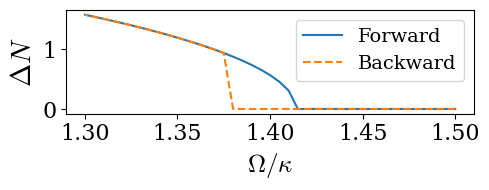

In [56]:
fig = plt.subplots(1, 1, figsize=(5,2))

plt.plot(Omega_values_forward,np.abs(r_avg_forward),label="Forward")
plt.plot(Omega_values_backward,np.abs(r_avg_backward),'--',label="Backward")

cbar.ax.tick_params(labelsize=14)
plt.xlabel(r'$\Omega/\kappa$', fontsize=18)
# ax[k].set_title(rf'Entanglement ($\varepsilon$)', fontsize=18)
# ax[k].set_yticks([0.5,1,1.5,2,2.5,3])
plt.tick_params(labelsize=16)
plt.ylabel(r'$\Delta N$', fontsize=20)
plt.legend(fontsize=14, loc='upper right')


plt.tight_layout()
plt.show()

# Fig. S1(a,b): Bistability diagram in the Appendix

In [8]:
import numpy as np
from scipy.integrate import odeint
from multiprocessing import Pool

# Define the vector field for the differential equations
def vectorfield_BHm(m, t, p):
    xA, pA, xB, pB = m
    Omega, kappa, U = p
    
    # Differential equations
    f = [
        Omega * pB / 2 - kappa * xA * (xB**2 + pB**2) / 4 + U * pA * (xA**2 + pA**2),
        -Omega * xB / 2 - kappa * pA * (xB**2 + pB**2) / 4 - U * xA * (xA**2 + pA**2),
        Omega * pA / 2 + kappa * xB * (xA**2 + pA**2) / 4 + U * pB * (xB**2 + pB**2),
        -Omega * xA / 2 + kappa * pB * (xA**2 + pA**2) / 4 - U * xB * (xB**2 + pB**2)
    ]
    
    return f



# Function to calculate variances for a given U
def calculate_variance_for_U(U):
    # Initial parameters
    Omega_initial = 0.0
    kappa = 1
    xx = 0.3
    m0 = [np.sqrt(xx), np.sqrt(2 - xx), np.sqrt(2 - xx), np.sqrt(xx)]

    # Time parameters
    f_s = 10  # number of time steps per second
    end_time_initial = 1500  # initial simulation time (1000 seconds)
    time_initial = np.linspace(0.0, end_time_initial, end_time_initial * f_s)

    # ODE solver parameters
    abserr = 1.0e-12
    relerr = 1.0e-10
    
    p = [Omega_initial, kappa, U]
    msol_sweep = odeint(vectorfield_BHm, m0, time_initial, args=(p,), atol=abserr, rtol=relerr)
    m0=msol_sweep[-1]
    # Calculate the Omega region with more resolution around sqrt(Omega_initial**2 - 1) / 4
    Omega_center = np.sqrt(16 * U**2 + 1)

    # Ensure Omega_high_res is constrained within [0, 1.5]
    Omega_high_res_start = max(Omega_center - 0.2, 0)  # Ensure it doesn't go below 0
    Omega_high_res_end = min(Omega_center + 0.2, 1.5)  # Ensure it doesn't go above 1.5

    # Set step size to 0.01 for the high-resolution region
    high_res_step = 0.01
    num_steps_high_res = int((Omega_high_res_end - Omega_high_res_start) / high_res_step) + 1

    # Create Omega_high_res array with a step of 0.01
    Omega_high_res = np.linspace(Omega_high_res_start, Omega_high_res_end, num_steps_high_res)

    # Set step size to 0.05 for the low-resolution region to the left of the high-resolution region
    low_res_left_step = 0.05
    num_steps_low_res_left = int(Omega_high_res_start / low_res_left_step) + 1

    # Create Omega_low_res_left array with a step of 0.05
    Omega_low_res_left = np.linspace(0, Omega_high_res_start, num_steps_low_res_left)

    # Set step size to 0.05 for the low-resolution region to the right of the high-resolution region
    low_res_right_step = 0.05
    num_steps_low_res_right = int((1.5 - Omega_high_res_end) / low_res_right_step) + 1

    # Create Omega_low_res_right array with a step of 0.05
    Omega_low_res_right = np.linspace(Omega_high_res_end, 1.5, num_steps_low_res_right)

    # Combine into a single Omega sweep array
    Omega_values = np.concatenate([Omega_low_res_left, Omega_high_res, Omega_low_res_right])

    # Initialize a list to store variances for this U
    variances = []
    
    dyn=[]
    # For each Omega, solve the system and calculate the variance
    for Omega in Omega_values:
        p = [Omega, kappa, U]

        # Solve the system with the new Omega value
        msol_sweep = odeint(vectorfield_BHm, m0, time_initial, args=(p,), atol=abserr, rtol=relerr)

        # Compute the variance over the last 500 seconds for the given Omega and U
        variance = np.mean(msol_sweep[-10000:, 0]**2 + msol_sweep[-10000:, 1]**2 - (msol_sweep[-10000:, 2]**2 + msol_sweep[-10000:, 3]**2))
        
        # Store the variance in the variances list
        variances.append(variance)
        
        m0= msol_sweep[-1]

    return variances



In [11]:
# Adiabatic sweep parameters for U values
U_values = np.linspace(0, 0.3, 61)  # U from 0 to 0.3, 31 values
variance_results = []  # List to store variance results for each U

# Parallelize the calculation of variances for each U value
if __name__ == "__main__":
    with Pool() as pool:
        variance_results = pool.map(calculate_variance_for_U, U_values)

# Convert the list of variances into a 2D array for further processing if needed
max_length = max(len(v) for v in variance_results)
variance_array = np.full((len(U_values), max_length), np.nan)  # Initialize with NaN to handle varying lengths

# Fill the variance_array with the results
for i, variances in enumerate(variance_results):
    variance_array[i, :len(variances)] = variances


# Assuming variance_results is obtained from the previous code
# variance_results = ... (this should be filled with actual calculations)

# Create a grid for contour plotting
# Create a list to hold all Omega values across all U values
all_Omega_values = []

# Create a list to hold all variances for interpolation
all_variances = []

# Populate the lists for contour plotting
for i, variances in enumerate(variance_results):
    U = U_values[i]
    Omega_center = np.sqrt(16 * U**2 + 1)
    Omega_high_res_start = max(Omega_center - 0.2, 0)
    Omega_high_res_end = min(Omega_center + 0.2, 1.5)
    
    # Set step size to 0.01 for the high-resolution region
    high_res_step = 0.01
    num_steps_high_res = int((Omega_high_res_end - Omega_high_res_start) / high_res_step) + 1
    Omega_high_res = np.linspace(Omega_high_res_start, Omega_high_res_end, num_steps_high_res)

    # Set step size to 0.05 for the low-resolution region to the left of the high-resolution region
    low_res_left_step = 0.05
    num_steps_low_res_left = int(Omega_high_res_start / low_res_left_step) + 1
    Omega_low_res_left = np.linspace(0, Omega_high_res_start, num_steps_low_res_left)

    # Set step size to 0.05 for the low-resolution region to the right of the high-resolution region
    low_res_right_step = 0.05
    num_steps_low_res_right = int((1.5 - Omega_high_res_end) / low_res_right_step) + 1
    Omega_low_res_right = np.linspace(Omega_high_res_end, 1.5, num_steps_low_res_right)

    # Combine into a single Omega sweep array
    Omega_values = np.concatenate([Omega_low_res_left, Omega_high_res, Omega_low_res_right])

    # Add to the list of all Omega values and variances
    all_Omega_values.append(Omega_values)
    all_variances.append(variances)

# Create a grid for contour plotting
# Generate a regular grid of U and Omega values for contourf
Omega_grid, U_grid = np.meshgrid(np.concatenate(all_Omega_values), U_values)

# Flatten the lists for griddata
U_flat = np.array([U for U, variances in zip(U_values, all_variances) for _ in range(len(variances))])
Omega_flat = np.concatenate(all_Omega_values)
variance_flat = np.concatenate([variances for variances in all_variances])

np.savetxt('raw_ra_rb.dat',variance_flat)
np.savetxt('Omega_flat.dat',Omega_flat)
np.savetxt('U_flat.dat',U_flat)

In [13]:
def calculate_reversed_variance_for_U(U):
    # Initial parameters
    Omega_initial = 1.5
    kappa = 1
    xx = 0.3
    m0 = [np.sqrt(xx), np.sqrt(2 - xx), np.sqrt(2 - xx), np.sqrt(xx)]

    # Time parameters
    f_s = 10  # number of time steps per second
    end_time_initial = 1000  # initial simulation time (1000 seconds)
    time_initial = np.linspace(0.0, end_time_initial, end_time_initial * f_s)

    # ODE solver parameters
    abserr = 1.0e-12
    relerr = 1.0e-10
    
    p = [Omega_initial, kappa, U]
    msol_sweep = odeint(vectorfield_BHm, m0, time_initial, args=(p,), atol=abserr, rtol=relerr)
    m0=msol_sweep[-1]
    # Calculate the Omega region with more resolution around sqrt(Omega_initial**2 - 1) / 4
    Omega_center = np.sqrt(16 * U**2 + 1)

    # Ensure Omega_high_res is constrained within [0, 1.5]
    Omega_high_res_start = max(Omega_center - 0.2, 0)  # Ensure it doesn't go below 0
    Omega_high_res_end = min(Omega_center + 0.2, 1.5)  # Ensure it doesn't go above 1.5

    # Set step size to 0.01 for the high-resolution region
    high_res_step = 0.005
    num_steps_high_res = int((Omega_high_res_end - Omega_high_res_start) / high_res_step) + 1

    # Create Omega_high_res array with a step of 0.01
    Omega_high_res = np.linspace(Omega_high_res_start, Omega_high_res_end, num_steps_high_res)

    # Set step size to 0.05 for the low-resolution region to the left of the high-resolution region
    low_res_left_step = 0.05
    num_steps_low_res_left = int(Omega_high_res_start / low_res_left_step) + 1

    # Create Omega_low_res_left array with a step of 0.05
    Omega_low_res_left = np.linspace(0, Omega_high_res_start, num_steps_low_res_left)

    # Set step size to 0.05 for the low-resolution region to the right of the high-resolution region
    low_res_right_step = 0.05
    num_steps_low_res_right = int((1.5 - Omega_high_res_end) / low_res_right_step) + 1

    # Create Omega_low_res_right array with a step of 0.05
    Omega_low_res_right = np.linspace(Omega_high_res_end, 1.5, num_steps_low_res_right)

    # Combine into a single Omega sweep array and reverse it
    Omega_values = np.concatenate([Omega_low_res_left, Omega_high_res, Omega_low_res_right])[::-1]

    # Initialize a list to store reversed variances for this U
    reversed_variances = []

    # For each Omega, solve the system and calculate the variance
    for Omega in Omega_values:
        p = [Omega, kappa, U]

        # Solve the system with the new Omega value
        msol_sweep = odeint(vectorfield_BHm, m0, time_initial, args=(p,), atol=abserr, rtol=relerr)

        # Compute the variance over the last 500 seconds for the given Omega and U
        variance = np.mean(msol_sweep[-3000:, 0]**2 + msol_sweep[-3000:, 1]**2 - (msol_sweep[-3000:, 2]**2 + msol_sweep[-3000:, 3]**2))
        
        # Store the variance in the reversed_variances list
        reversed_variances.append(variance)
        
        
        m0= msol_sweep[-1]
    return reversed_variances

# Adiabatic sweep parameters for U values
U_values = np.linspace(0, 0.3, 61)  # U from 0 to 0.3, 31 values
variance_results = []  # List to store variance results for each U

# Parallelize the calculation of reversed variances for each U value
if __name__ == "__main__":
    with Pool() as pool:
        variance_results = pool.map(calculate_reversed_variance_for_U, U_values)

# Convert the list of reversed variances into a 2D array for further processing if needed
max_length = max(len(v) for v in variance_results)
variance_array = np.full((len(U_values), max_length), np.nan)  # Initialize with NaN to handle varying lengths

# Fill the variance_array with the results
for i, variances in enumerate(variance_results):
    variance_array[i, :len(variances)] = variances

    # Assuming variance_results is obtained from the previous code
# variance_results = ... (this should be filled with actual calculations)

# Create a grid for contour plotting
# Create a list to hold all Omega values across all U values
all_Omega_values = []

# Create a list to hold all variances for interpolation
all_variances = []

# Populate the lists for contour plotting
for i, variances in enumerate(variance_results):
    U = U_values[i]
    Omega_center = np.sqrt(16 * U**2 + 1)
    Omega_high_res_start = max(Omega_center - 0.2, 0)
    Omega_high_res_end = min(Omega_center + 0.2, 1.5)
    
    # Set step size to 0.01 for the high-resolution region
    high_res_step = 0.01
    num_steps_high_res = int((Omega_high_res_end - Omega_high_res_start) / high_res_step) + 1
    Omega_high_res = np.linspace(Omega_high_res_start, Omega_high_res_end, num_steps_high_res)

    # Set step size to 0.05 for the low-resolution region to the left of the high-resolution region
    low_res_left_step = 0.05
    num_steps_low_res_left = int(Omega_high_res_start / low_res_left_step) + 1
    Omega_low_res_left = np.linspace(0, Omega_high_res_start, num_steps_low_res_left)

    # Set step size to 0.05 for the low-resolution region to the right of the high-resolution region
    low_res_right_step = 0.05
    num_steps_low_res_right = int((1.5 - Omega_high_res_end) / low_res_right_step) + 1
    Omega_low_res_right = np.linspace(Omega_high_res_end, 1.5, num_steps_low_res_right)

    # Combine into a single Omega sweep array
    Omega_values = np.concatenate([Omega_low_res_left, Omega_high_res, Omega_low_res_right])

    # Add to the list of all Omega values and variances
    all_Omega_values.append(Omega_values)
    all_variances.append(variances)

# Create a grid for contour plotting
# Generate a regular grid of U and Omega values for contourf
Omega_grid, U_grid = np.meshgrid(np.concatenate(all_Omega_values), U_values)

# Flatten the lists for griddata
U_flat = np.array([U for U, variances in zip(U_values, all_variances) for _ in range(len(variances))])
Omega_flat = np.concatenate(all_Omega_values)
variance_flat = np.concatenate([variances for variances in all_variances])

np.savetxt('rev_ra_rb.dat',variance_flat)
np.savetxt('rev_Omega_flat.dat',Omega_flat)
np.savetxt('rev_U_flat.dat',U_flat)

In [15]:
# Load the data
Omega_flat = np.genfromtxt('Omega_flat.dat')
U_flat = np.genfromtxt('U_flat.dat')
variance_flat = np.genfromtxt('raw_ra_rb.dat')

Omega_rev = np.genfromtxt('rev_Omega_flat.dat')
U_rev = np.genfromtxt('rev_U_flat.dat')
variance_rev = np.genfromtxt('revra_rb.dat')


/tmp/ipykernel_3986361/416434219.py:26: RuntimeWarning: invalid value encountered in sqrt
  ax[k].plot(np.linspace(0.0001, 1.5, 10001), np.sqrt(np.linspace(0, 1.5, 10001)**2 - 1) / 4, 'w--',linewidth=2)
/tmp/ipykernel_3986361/416434219.py:81: RuntimeWarning: invalid value encountered in sqrt
  ax[k].plot(np.linspace(0.0001, 1.5, 10001), np.sqrt(np.linspace(0, 1.5, 10001)**2 - 1) / 4, 'w--',linewidth=2)


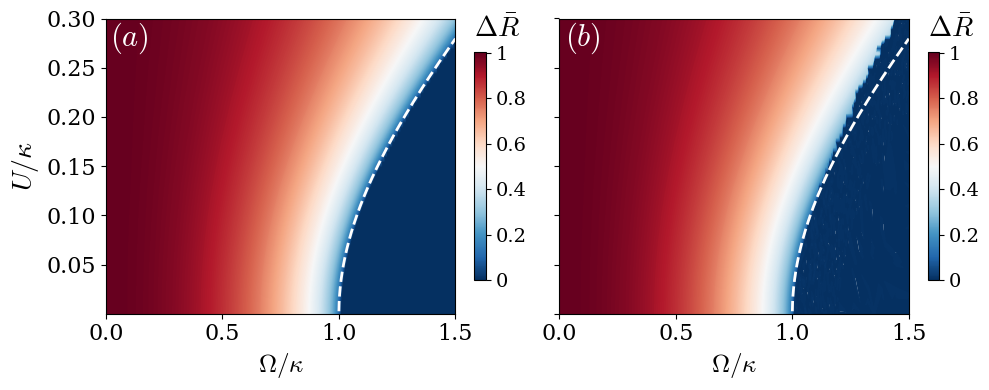

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(10,4))

k=0

im = ax[k].tricontourf(Omega_flat, U_flat, np.abs(variance_flat/4), levels=300, cmap='RdBu_r', vmin=0, vmax=np.max(np.abs(variance_flat/4)))

cbar = fig.colorbar(im, ax=ax[k], fraction=0.03)

# ax[k].plot(1,1,'Pk',markersize=10)
# ax[k].plot(1,2,'Xk',markersize=10)
# ax[k].plot(1,2.95,'^k',markersize=10)
# Set the ticks you want on the colorbar
cbar.set_ticks([0, 0.2, 0.4, 0.6, 0.8, 1])
cbar.set_ticklabels(['0', '0.2', '0.4', '0.6', '0.8', '1'])
cbar.ax.tick_params(labelsize=14, color='black', labelcolor='black')
# cbar.set_label(r'$\varepsilon$', fontsize=18, labelpad=15)
# cbar.ax.xaxis.set_label_position('top')
cbar.ax.text(
   2, 1.1,  # Position (x, y) in axes coordinates
    r'$\Delta \bar{R}$',  # Text to display
    ha='center',  # Horizontal alignment
    va='center',  # Vertical alignment
    fontsize=20,  # Font size
    transform=cbar.ax.transAxes  # Use axes coordinates
)
ax[k].plot(np.linspace(0.0001, 1.5, 10001), np.sqrt(np.linspace(0, 1.5, 10001)**2 - 1) / 4, 'w--',linewidth=2)

# Optional: Set the edge color of each collection to the face color
for c in im.collections:
    c.set_edgecolor("face")

# cbar.ax.tick_params(labelsize=14)
ax[k].set_xlabel(r'$\Omega/\kappa$', fontsize=18)
# ax[k].set_title(rf'Entanglement ($\varepsilon$)', fontsize=18)
ax[k].set_yticks([0.05,.1,.15,.2,.25,.3])
ax[k].tick_params(labelsize=16)
ax[k].set_ylabel(r'$U/\kappa $', fontsize=20)

ax[k].text(
    0.1, 0.28,  # Position (x, y) in figure coordinates
    r'$(a)$',  # Text to display
    ha='center',  # Horizontal alignment
    va='center',  # Vertical alignment
    fontsize=22,  # Font size
    color='white'
)


k=1
im = ax[k].tricontourf(Omega_rev, U_rev, np.abs(variance_rev/4), levels=300, cmap='RdBu_r', vmin=0, vmax=np.max(np.abs(variance_rev/4)))
# ax[k].plot(Omega_vals,0.2*np.ones(len(Omega_vals)),'--w')
# ax[k].plot(Ω[0],0.2,'dw', markersize=10)
# ax[k].plot(Ω[1],0.2,'sw', markersize=10)
# ax[k].plot(Ω[2],0.2,'^w', markersize=10)

cbar = fig.colorbar(im, ax=ax[k], fraction=0.03)#, fraction=0.046, pad=0.04

# Set the ticks you want on the colorbar
# cbar.set_ticks([0, 1, 2,3, 4, 5,6])
# cbar.set_ticklabels(['0', '0.5', '1', '1.5', '2', '2.5', '3'])
cbar.set_ticks([0, 0.2, 0.4, 0.6, 0.8, 1])
cbar.set_ticklabels(['0', '0.2', '0.4', '0.6', '0.8', '1'])
cbar.ax.tick_params(labelsize=14, color='black', labelcolor='black')
# cbar.set_label(r'$\varepsilon$', fontsize=18, labelpad=15)
# cbar.ax.xaxis.set_label_position('top')
cbar.ax.text(
   2, 1.1,  # Position (x, y) in axes coordinates
    r'$\Delta \bar{R}$',  # Text to display
    ha='center',  # Horizontal alignment
    va='center',  # Vertical alignment
    fontsize=20,  # Font size
    transform=cbar.ax.transAxes  # Use axes coordinates
    
)
Oo_val=np.linspace(1.001,1.5,100)
for c in im.collections:
    c.set_edgecolor("face")
cbar.ax.tick_params(labelsize=14)
ax[k].yaxis.set_ticklabels([])

ax[k].plot(np.linspace(0.0001, 1.5, 10001), np.sqrt(np.linspace(0, 1.5, 10001)**2 - 1) / 4, 'w--',linewidth=2)
ax[k].set_xlabel(r'$\Omega/\kappa$', fontsize=18)
# ax[k].set_title(rf'Entanglement ($\varepsilon$)', fontsize=18)
# ax[k].set_yticks([0.05,.1,.15,.2,.25,.3])
ax[k].tick_params(labelsize=16)
# ax[k].set_ylabel(r'$U $', fontsize=18)
ax[k].text(
    0.1, 0.28,  # Position (x, y) in figure coordinates
    r'$(b)$',  # Text to display
    ha='center',  # Horizontal alignment
    va='center',  # Vertical alignment
    fontsize=22,  # Font size
    color='white'
)

plt.tight_layout()
# plt.savefig('bistable.png',dpi=300)
plt.show()